In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
# Import Ridge from sklearn's linear_model module
from sklearn.linear_model import Ridge

# Import SVR from sklearn's svm module
from sklearn.svm import SVR

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier
%matplotlib inline


In [106]:
train_data = pd.read_csv("/Users/hilalhakkani/Desktop/Project-PredictingTitanicSurvivors/DataSets/train.csv")
test_data = pd.read_csv("/Users/hilalhakkani/Desktop/Project-PredictingTitanicSurvivors/DataSets/test.csv")



In [107]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [108]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


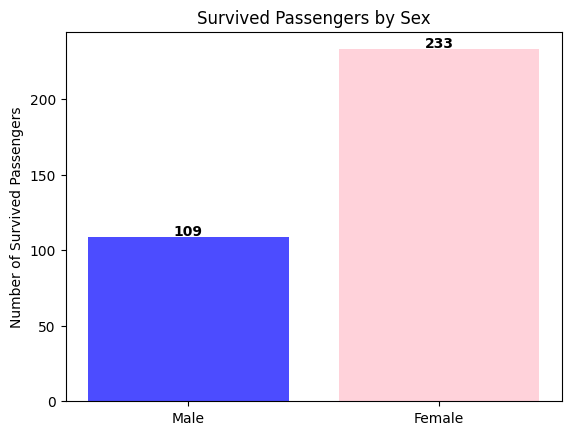

In [109]:
# Count number of survived passengers by sex
survived_counts = train_data[train_data['Survived'] == 1]['Sex'].value_counts()
maleSurvivors = survived_counts["male"]
femaleSurvivors = survived_counts["female"]

fig, ax = plt.subplots()

ax.bar(['Male', 'Female'], survived_counts[['male','female']], color=['blue','pink'], alpha=0.7)

# Labels and title
ax.set_ylabel("Number of Survived Passengers")
ax.set_title("Survived Passengers by Sex")

ax.text(0,maleSurvivors + 1, maleSurvivors , ha='center', fontweight='bold')
ax.text(1,femaleSurvivors + 1, femaleSurvivors , ha='center', fontweight='bold')

plt.show()

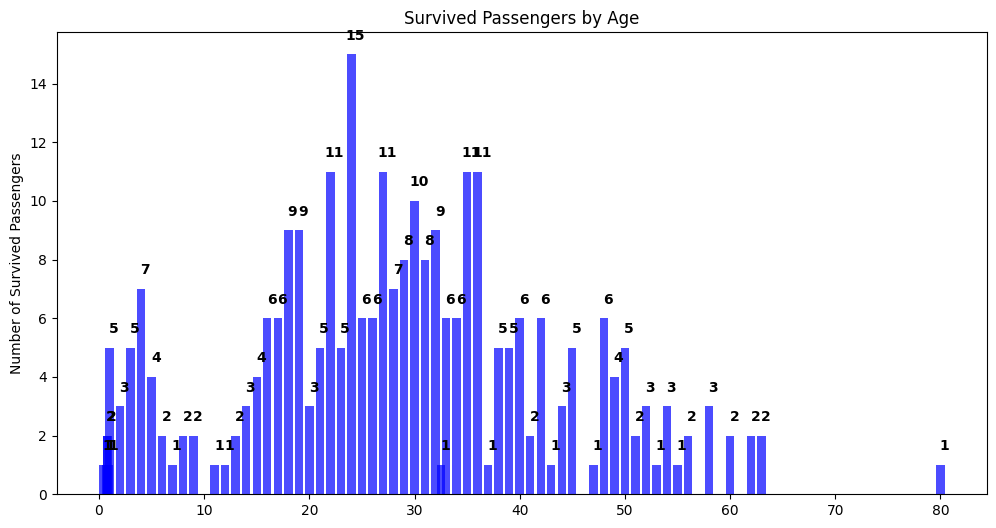

In [110]:
# Count number of survived passengers by age group
survived_counts = train_data[train_data['Survived'] == 1]['Age'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(12,6))   

# Labels and title
ax.set_ylabel("Number of Survived Passengers")
ax.set_title("Survived Passengers by Age")

bars = ax.bar(survived_counts.index, survived_counts.values, color='blue', alpha=0.7)
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width(), height + 0.5, str(int(height)), ha='center', fontweight='bold')

plt.show()

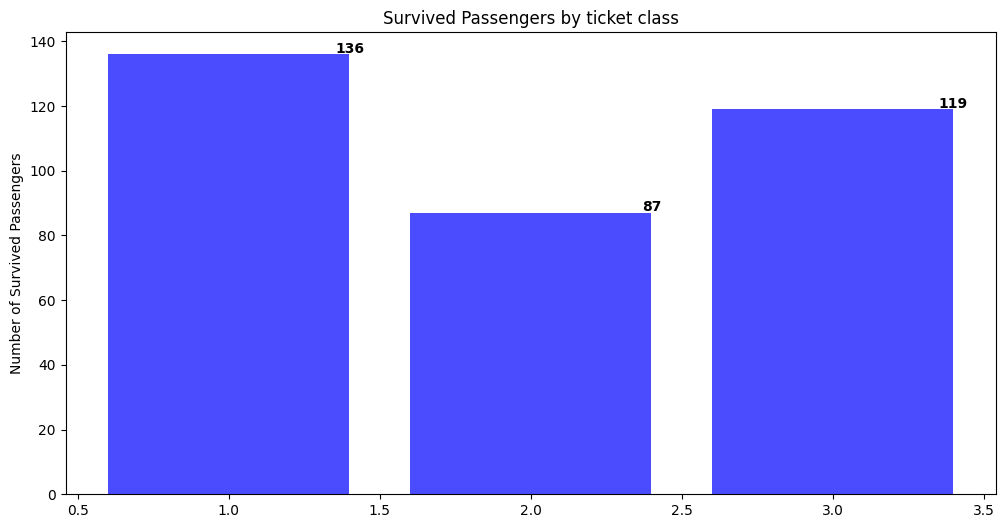

In [111]:
# Count number of survived passengers by ticket class
survived_counts = train_data[train_data['Survived'] == 1]['Pclass'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(12,6))   

# Labels and title
ax.set_ylabel("Number of Survived Passengers")
ax.set_title("Survived Passengers by ticket class")

bars = ax.bar(survived_counts.index, survived_counts.values, color='blue', alpha=0.7)
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width(), height + 0.5, str(int(height)), ha='center', fontweight='bold')

plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Check missing Data (Age 177 Cabin 687 Embarked 2)
print(f"Missing Data {train_data.isna().sum()}")

# 1. Fill Age with Median Strategy
age_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))])
age_feature = ["Age"]

# 2. Fill Cabin with Constant values
cabin_feature = ["Cabin"]
cabin_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="B1")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
    ])

# 3. Remove rows with no value (NaN's in the Embarked column) train_data.dropna(subset=["Embarked"], inplace=True)

# 3. Ignore Embarked na values 
embarked_feature = ["Embarked"]
embarked_transformer = Pipeline(steps=[
    # Set SimpleImputer strategy to "constant" and fill value to "missing"
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    # Set OneHotEncoder to ignore the unknowns
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
    ])

preprocessor = ColumnTransformer(
    transformers=[
        ("age", age_transformer, age_feature),
        ("cabin", cabin_transformer, cabin_feature),
        ("embarked", embarked_transformer, embarked_feature)])

# Try models like Logistic Regression, Random Forest, or XGBoost
regression_models = {
    "LogisticRegression": LogisticRegression(),
    "RandomForestClassifier": RandomForestClassifier(),
    "XGBClassifier": XGBClassifier()
}

# Create an empty dictionary for the regression results
regression_results = {}


train_data_X = train_data.drop("Survived", axis=1)
train_data_y = train_data["Survived"]

X_train, X_test, y_train, y_test = train_test_split(train_data_X, train_data_y, test_size=0.2, random_state=42)

# Loop through the items in the regression_models dictionary
for model_name, model in regression_models.items():
    
    model_pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("model", model)])
    
    print(f"Fitting {model_name}...")
    model_pipeline.fit(X_train, y_train)
    
    # results dictionary
    print(f"Scoring {model_name}...")
    regression_results[model_name] = model_pipeline.score(X_test, y_test)
    
    
    print(f"regression_results {regression_results}...")


Missing Data PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Fitting XGBClassifier...


ValueError: could not convert string to float: 'C124'